# Trajectories by simple integration for advected waves and unadvected waves

In [1]:

import numpy as np
import xarray as xr
import stagem1.temporal_integration as sti

%matplotlib inline
from matplotlib import pyplot as plt

import xsimlab as xs

## Library stagem1.temporal_integration description 
 Allows to run a simulation with xarray-simlab which calculates trajectories (positions and velocities) of particules knowing the analytical formula of velocity using Euler or Runge Kutta (order 2 or 4) method in SetUp class. Then the Temp_Int_Comp offers to compare results of the three last integration methods.

To import: `import stagem1.temporal_integration as sti`

### SetUp class
#### Members
- model
- in_ds
- out_ds

#### Parameters of SetUp constructor
Default is :
- the integration method: `intmethod=Euler`
- the position initiation class: `init_p=InitPRegular`
- time parameters of the simulation: `time=list(np.arange(0,d2s*4, h2s/2)), otime=list(np.arange(0, d2s*4, h2s))`, 
- parameters for positions initiations (min, max, particules number): `init_mini=0, init_maxi=200*km, init_N=100`,
- parameters for the analytical velocity : `um=0.1, uw=0.1, w=w2, k=k2, advected=1`

You are free to change them building your object giving them to SetUp constructor: `x=sti.SetUp(um=1)` for example.

#### Methods to use
- To change the integration method: `update_model(intmethod=sti.newmethod)` with new method in 'Euler', 'Runge_Kutta2' or 'Runge_Kutta4'
- To change parameters: `update_parameters(par1=..., par2=...)` with par1 and par2 in `velocity__um`, `velocity__uw`, `velocity__k`, `velocity__w`, `init_mini`, `init_maxi`, `init_N`.
- To print positions: `print_positions(slice_step=10)` for trajectories for every ten particules,  or `print_positions_fac(slice_step=10)` for positions for all particules at every t spaced of ten time step.
- To print the advancement for some particules: `print_adv(slice_step=10)`
- To compute the difference with the velocity out and the velocity computed from positions out via the analytical formula: `analytical_comparison()`
- To get positions, velocities, advancement, out times our velocity parameters: `x["p"]`, `x["v"]`, `x["adv"]`,`x['otime']`... define thanks to `__getitem__`



In [2]:
#Main parameters
d2s=86400 #24h in s
h2s=3600  #1h in s
w2=2*2*np.pi/86400 #wave pulsation
km=1e3
dt=1*h2s # model step
L=100*km
k2=2*np.pi/L


## Class SetUp Test

In [3]:
x=sti.SetUp()
x.out_ds

<xarray.Dataset>
Dimensions:             (a: 100, otime: 96, time: 192)
Coordinates:
  * a                   (a) float64 0.0 2.02e+03 4.04e+03 ... 1.98e+05 2e+05
  * otime               (otime) int64 0 3600 7200 10800 ... 334800 338400 342000
  * time                (time) float64 0.0 1.8e+03 ... 3.42e+05 3.438e+05
    otime_day           (otime) float64 0.0 0.04167 0.08333 ... 3.917 3.958
Data variables:
    init__N             int64 100
    init__maxi          float64 2e+05
    init__mini          int64 0
    position__p         (otime, a) float64 0.0 2.02e+03 ... 2.325e+05 2.346e+05
    velocity__advected  int64 1
    velocity__k         float64 6.283e-05
    velocity__um        float64 0.1
    velocity__uw        float64 0.1
    velocity__v         (otime, a) float64 0.2 0.1992 0.1968 ... 0.1913 0.1854
    velocity__w         float64 0.0001454
    advancement         (otime, a) float64 0.0 0.0 0.0 ... 3.457e+04 3.459e+04

In [12]:
x.update_model(intmethod=sti.Runge_Kutta2)

In [13]:
x.analytical_comparison()

<xarray.DataArray ()>
array(True)

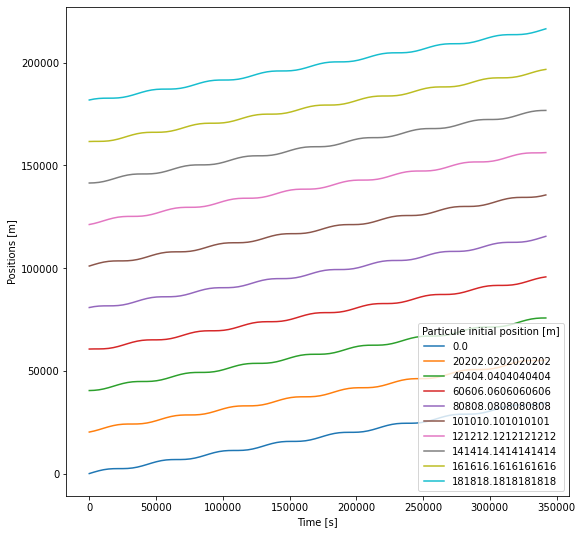

In [14]:
x.print_positions()

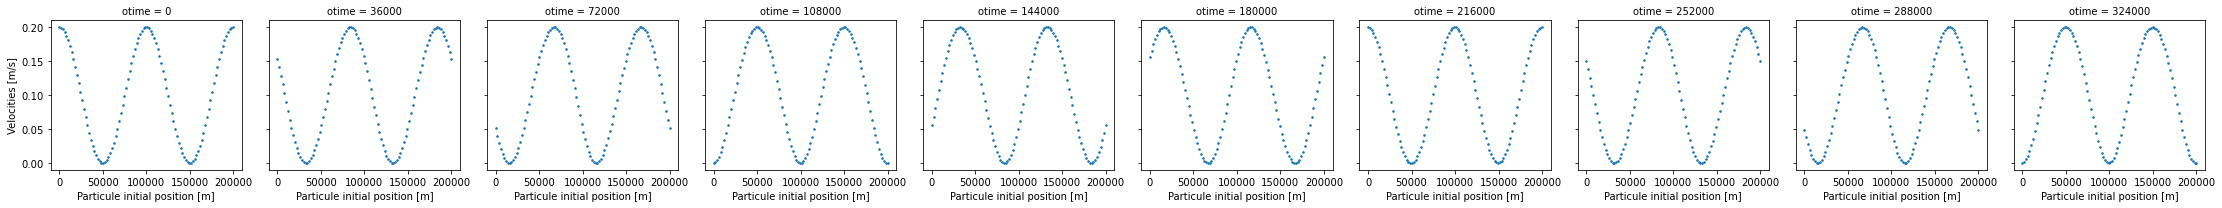

In [15]:
x.print_velocities()

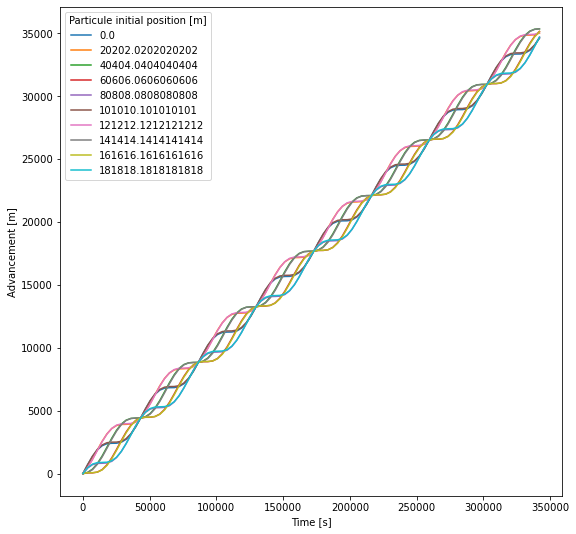

In [16]:
x.print_adv()


In [16]:
x["p"]

<xarray.DataArray 'position__p' (otime: 96, a: 100)>
array([[     0.        ,   2020.2020202 ,   4040.4040404 , ...,
        195959.5959596 , 197979.7979798 , 200000.        ],
       [   714.83441459,   2737.32741414,   4754.08029992, ...,
        196652.77196692, 198686.61391377, 200714.83441459],
       [  1366.09778927,   3412.55716386,   5448.07023546, ...,
        197241.90952447, 199309.03802288, 201366.09778927],
       ...,
       [ 33613.87595031,  35742.7904928 ,  37880.27215036, ...,
        229388.84429364, 231495.35725568, 233613.87595031],
       [ 34015.26886   ,  36097.06445006,  38187.34255299, ...,
        229880.86262415, 231942.93451681, 234015.26886   ],
       [ 34586.13188971,  36628.93058042,  38677.18905968, ...,
        230518.20104659, 232549.13946738, 234586.13188971]])
Coordinates:
  * a        (a) float64 0.0 2.02e+03 4.04e+03 ... 1.96e+05 1.98e+05 2e+05
  * otime    (otime) int64 0 3600 7200 10800 ... 331200 334800 338400 342000
Attributes:
    description:  positions of particules
    units:        m